In [2]:
# importing the neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

Read from csv file to Pandas DataFrame

In [3]:
df=pd.read_csv(r"C:\Users\joshua\Documents\Treasure\pythonic\Data Sets\StudentPerformanceFactors.csv")

In [4]:
df.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [5]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
df.shape

(6607, 20)

The dataset has 6607 rows and 20 columns

Check for nullity

In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Presence of null values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Separating numerical columns from categorical columns

In [9]:
numerical_col = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_col = [col for col in df.columns if df[col].dtype in ['object']]

In [10]:
numerical_col

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [11]:
categorical_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

Handling Missing Values in the Dataset:

Replacing missing values with it's mode for respective columns

In [12]:
def replace_missing_values(df, column_name):
  """
  Replace missing values in a specified column of a DataFrame with the mode of that column.

  Parameters:
  - df (pd.DataFrame): The DataFrame in which to replace missing values.
  - column_name (str): The name of the column where missing values will be replaced.

  Returns:
  pd.DataFrame: The DataFrame with missing values replaced.

  Raises:
  ValueError: If the specified column does not exist in the DataFrame or if the DataFrame is empty
  """

  # Check if the DataFrame is empty
  if df.empty:
    raise ValueError("The DataFrame is empty.")

  # Check if the column exists in the DataFrame
  if column_name not in df.columns:
    raise ValueError(f"The column '{column_name}' does not exist in the DataFrame.")

  mode_value = df[column_name].mode()[0]

  df[column_name] = df[column_name].fillna(mode_value)
  return df

Apply replace_missing_values function to the specified colums columns_to_replace.

In [13]:
columns_to_replace = [ 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home' ]

for columns in columns_to_replace:
    df_new = replace_missing_values(df, columns)

In [14]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Check for duplicates

In [15]:
df.duplicated().any()

False

No duplicates in the dataset

# Exploratory Data Analysis

Descriptive Statistics for the numerical columns

In [16]:
df.describe(include='number').round(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00
mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
std,5.99,11.55,1.47,14.40,1.23,1.03,3.89
min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
25%,16.00,70.00,6.00,63.00,1.00,2.00,65.00
50%,20.00,80.00,7.00,75.00,1.00,3.00,67.00
75%,24.00,90.00,8.00,88.00,2.00,4.00,69.00
max,44.00,100.00,10.00,100.00,8.00,6.00,101.00


Descriptive Statistics for the Categorical columns

In [17]:
df.describe(include='object').round(2)

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6607,6607,6607,6607,6607,6607,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,4003,4598,2638,5912,3313,3951,3814


In [18]:
sns.set_theme(style="dark")

## Distribution Analysis of Categorical Columns

Define a function to plot distributions of categorical columns in the dataset

In [19]:
def plot_categorical_distributions(df, limit=12):
    """
    Plot distributions of categorical variables in the provided DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data to be plotted.
        limit (int): The maximum number of categorical variables to plot. Default is 12.
        
    Categorical Variables:
    - 'Parental_Involvement'
    - 'Access_to_Resources'
    - 'Extracurricular_Activities'
    - 'Motivation_Level'
    - 'Internet_Access'
    - 'Family_Income'
    - 'Teacher_Quality'
    - 'School_Type'
    - 'Peer_Influence'
    - 'Learning_Disabilities'
    - 'Parental_Education_Level'
    - 'Distance_from_Home'
    - 'Gender'
    """

    # List of categorical variables
    categorical_vars = [
        'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
        'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
        'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
        'Distance_from_Home', 'Gender'
    ]

    # Limit the number of categorical variables to the specified limit
    limited_categorical_vars = categorical_vars[:limit] 

    # Create a 3x4 grid of subplots
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))

    # List of available Seaborn palettes
    seaborn_palettes = list(sns.palettes.SEABORN_PALETTES.keys())

    # Loop through each categorical variable and create a count plot
    for i, column_name in enumerate(limited_categorical_vars):
        selected_palette = random.choice(seaborn_palettes)
        
        # Determine the row and column for the subplot
        row = i // 4  # 4 columns
        col = i % 4
        
        # Create the count plot on the respective subplot
        sns.countplot(x=column_name, data=df, hue=column_name, palette=selected_palette, ax=axs[row, col], legend=False)
        
        axs[row, col].set_title(f"Distribution of {column_name}")
        axs[row, col].set_xlabel(column_name)
        axs[row, col].set_ylabel("Frequency")
        axs[row, col].tick_params(axis='x', rotation=90)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

Apply the function to view the distributions of categorical columns

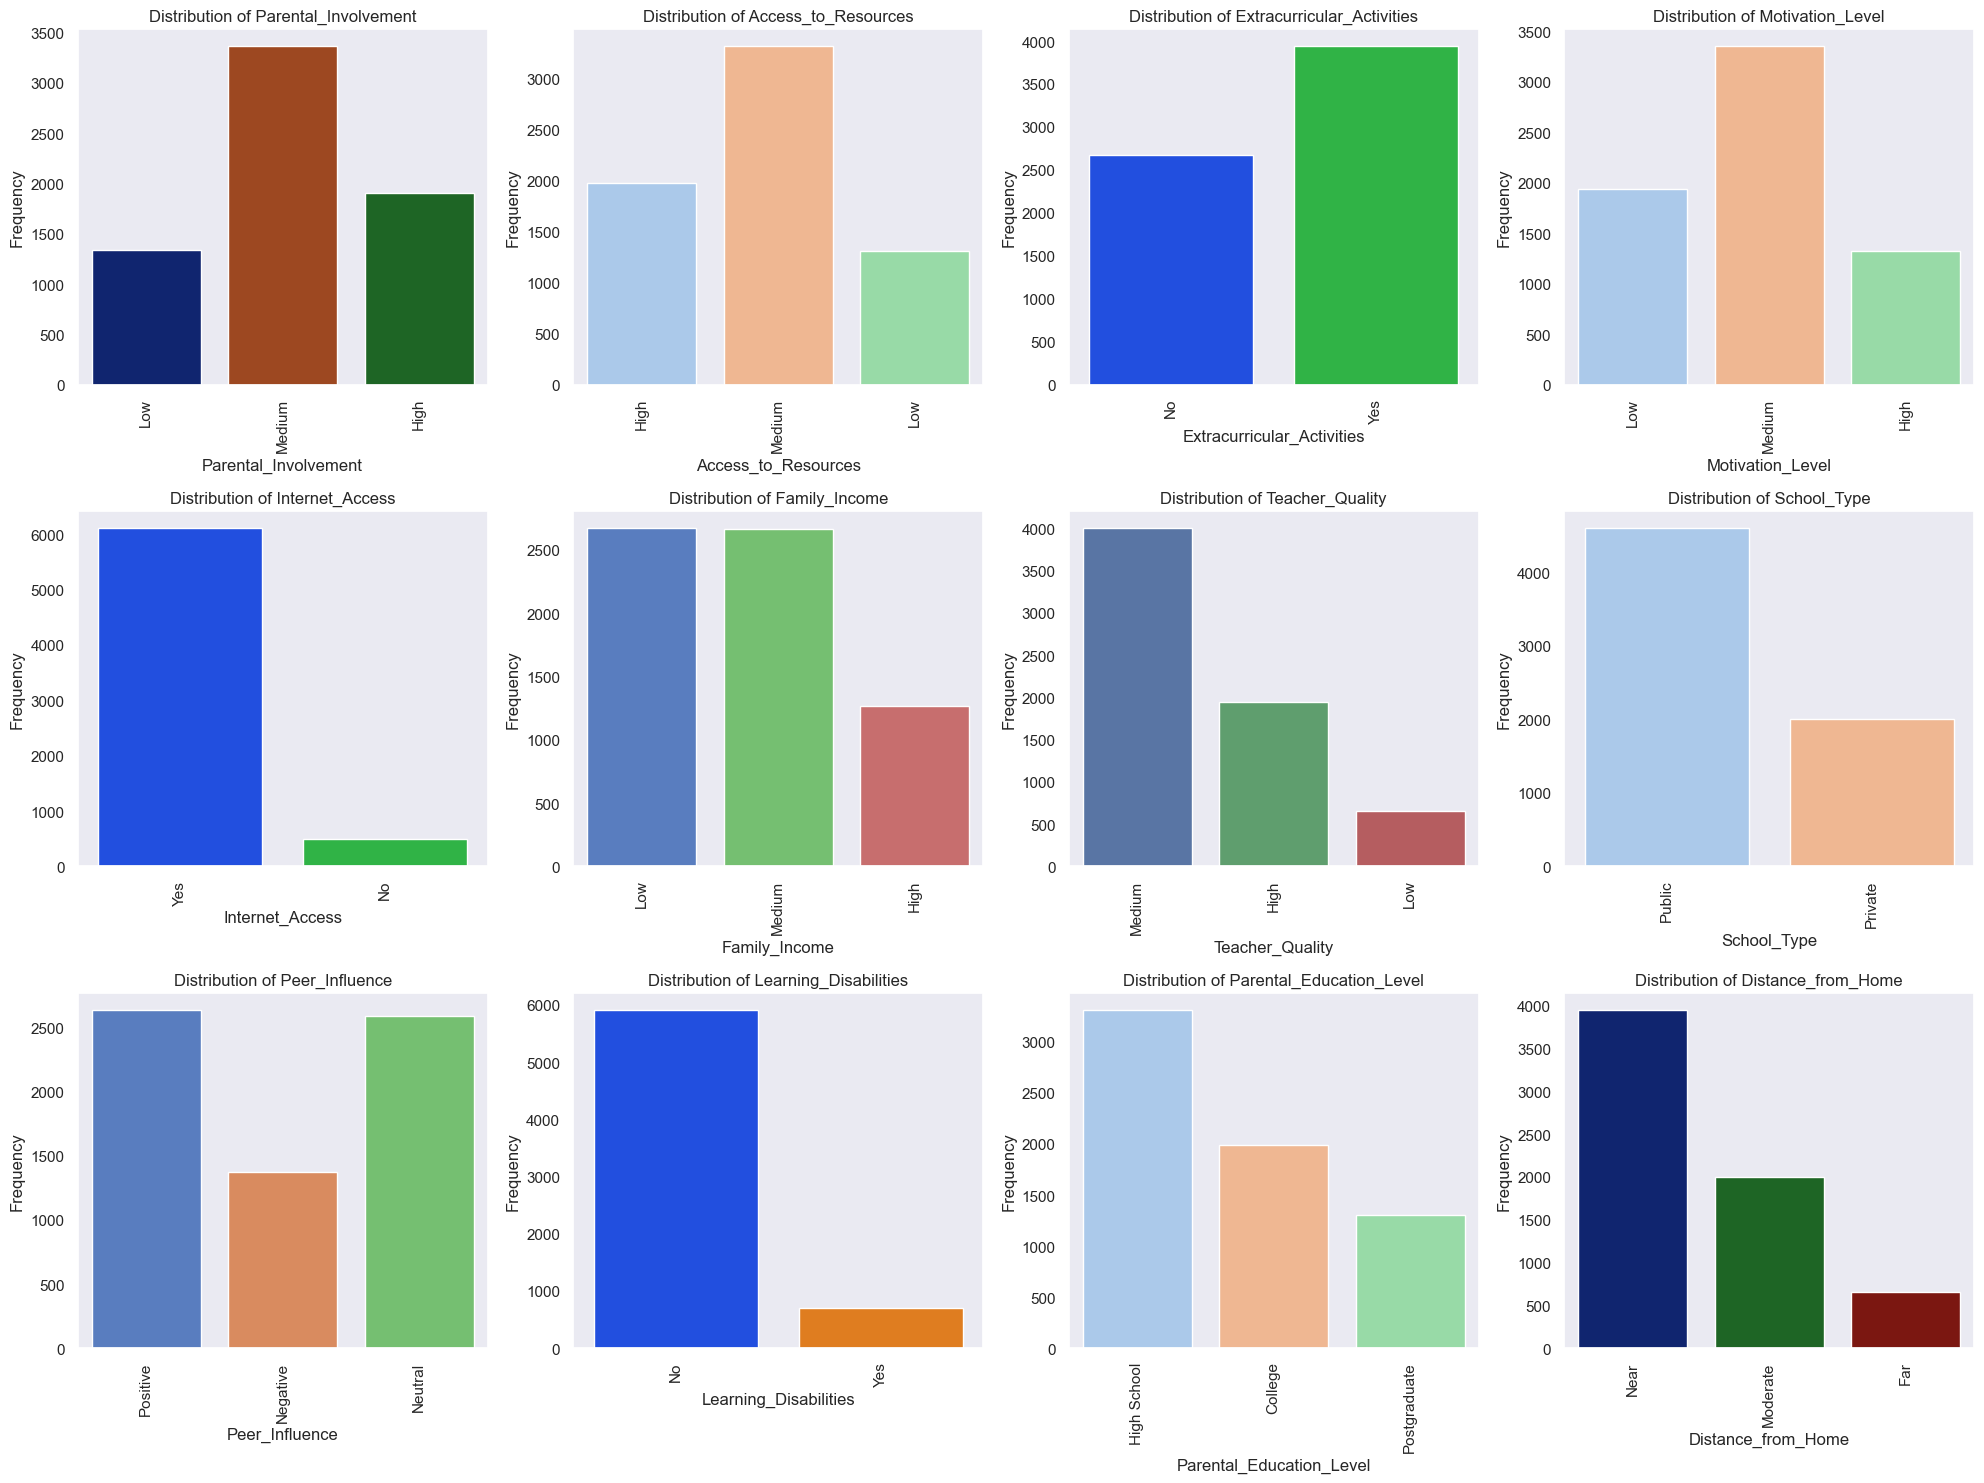

In [20]:
plot_categorical_distributions(df)

## Correlation Analysis

### Relationship between the numerical columns
Check for Relationship between Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity and Exam_Score

In [21]:
correlation_matrix=df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions',  'Physical_Activity',  'Exam_Score']].corr().round(2)
print("Correlation Matrix:")

ddf = pd.DataFrame(correlation_matrix)
ddf


Correlation Matrix:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.00,-0.01,0.01,0.02,-0.01,0.00,0.45
Attendance,-0.01,1.00,-0.02,-0.02,0.01,-0.02,0.58
Sleep_Hours,0.01,-0.02,1.00,-0.02,-0.01,-0.00,-0.02
Previous_Scores,0.02,-0.02,-0.02,1.00,-0.01,-0.01,0.18
Tutoring_Sessions,-0.01,0.01,-0.01,-0.01,1.00,0.02,0.16
Physical_Activity,0.00,-0.02,-0.00,-0.01,0.02,1.00,0.03
Exam_Score,0.45,0.58,-0.02,0.18,0.16,0.03,1.00


Heatmap

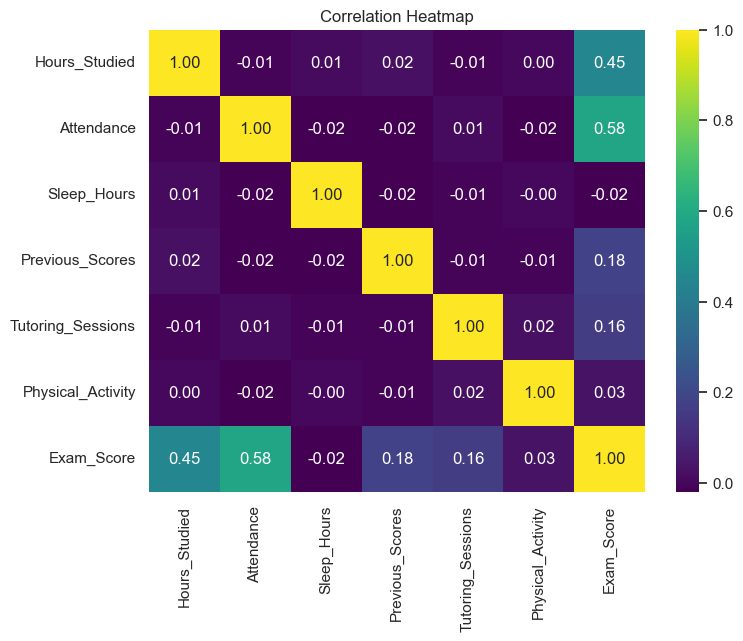

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Key Insights and Findings :
Correlations Between Other Variables and Exam Scores

1. Hours Studied (0.45): Moderate positive correlation, indicating that more study time is associated with higher exam scores.

2. Attendance (0.58): Strongest positive correlation, suggesting that students with better attendance tend to perform significantly better on exams.

3. Previous Scores (0.18): Weak positive correlation, indicating that past performance slightly predicts current exam scores but not strongly.

4. Tutoring Sessions (0.16): Weak positive correlation, suggesting that attending tutoring sessions has a minor positive impact on exam performance.

5. Physical Activity (0.03): Very weak correlation, indicating that physical activity does not significantly affect exam scores.

N.B:
**Attendance** and **Hours Studied** are the most influential factors for improving exam scores, while **Previous Scores**, **Tutoring Sessions**, and **Physical Activity** have minimal impact.

## Grouping for Analysis
### Socio_Economic Factors
Let's examine how socio-economic factors influence student performance. I've combined the columns for Family Income, Parental Education Level, Parental Involvement, and Access to Resources. These factors significantly impact academic success, and analyzing them together will help us understand their effect on exam scores.



In [23]:
df['socio_Economic'] = df[['Family_Income' , 'Parental_Education_Level' , 'Parental_Involvement' , 'Access_to_Resources']].sum(axis=1)

Function to Categorize Socio-Economic Status Based on Income and Education Level

In [24]:
# Define the function
def group_socio_economic(df):
    """
    Assigns socio-economic categories to individuals in the DataFrame based on 
    family income and parental education level.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing at least the following columns:
        - 'Family_Income'
        - 'Parental_Education_Level'
    
    Returns
    -------
    pandas.Series
        A Series containing socio-economic categories:
        
        - 'High_Socio' for rows where family income is 'High' and parental education level is 'Postgraduate'.
        - 'Medium_Socio' for rows where family income is 'Medium'.
        - 'Low_Socio' for all other cases.
    """
    conditions = [
        (df['Family_Income'] == 'High') & (df['Parental_Education_Level'] == 'Postgraduate'),
        (df['Family_Income'] == 'Medium')
    ]
    choices = ['High_Socio', 'Medium_Socio']
    
    df['socio_Category'] = np.select(conditions, choices, default='Low_Socio')



Apply the Function to Categorize Socio-Economic Status

In [25]:
group_socio_economic(df)

Pie Chart Visualization of Socio-Economic Category Distribution

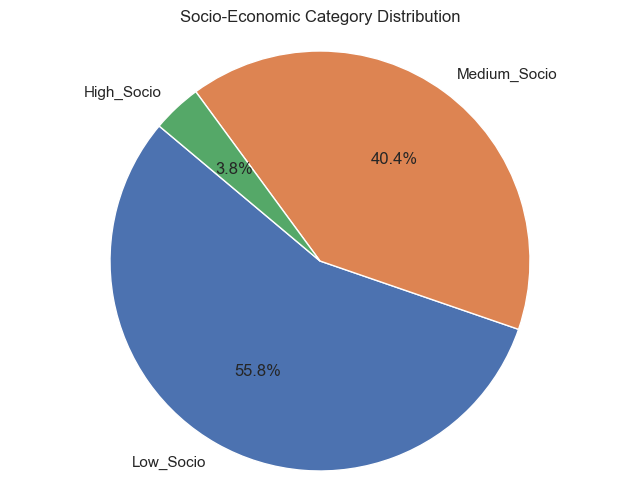

In [26]:
category_counts = df['socio_Category'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Socio-Economic Category Distribution")
plt.axis('equal')
plt.show()

Note:
Majority of the Students come from Low_Socio economic group (58.8 %), followed by Medium_Socio (40.4%) and few from High_Socio (3.8%)

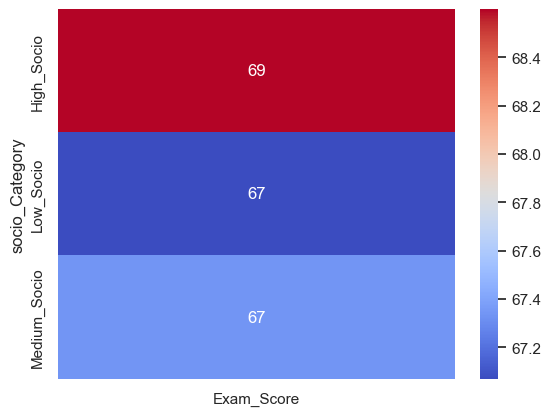

In [27]:
socio_economic_pivot = pd.pivot_table(df, values='Exam_Score', index='socio_Category', aggfunc='mean')
sns.heatmap(socio_economic_pivot, annot=True, cmap='coolwarm')
plt.show()

**Exam Scores by Socio-Economic Status**:

- Students from the High Socio-Economic Group have slightly better average scores (~69).
- Both the Medium and Low Socio-Economic Groups score similarly, around 67, with minimal difference between them.

## Pairplots

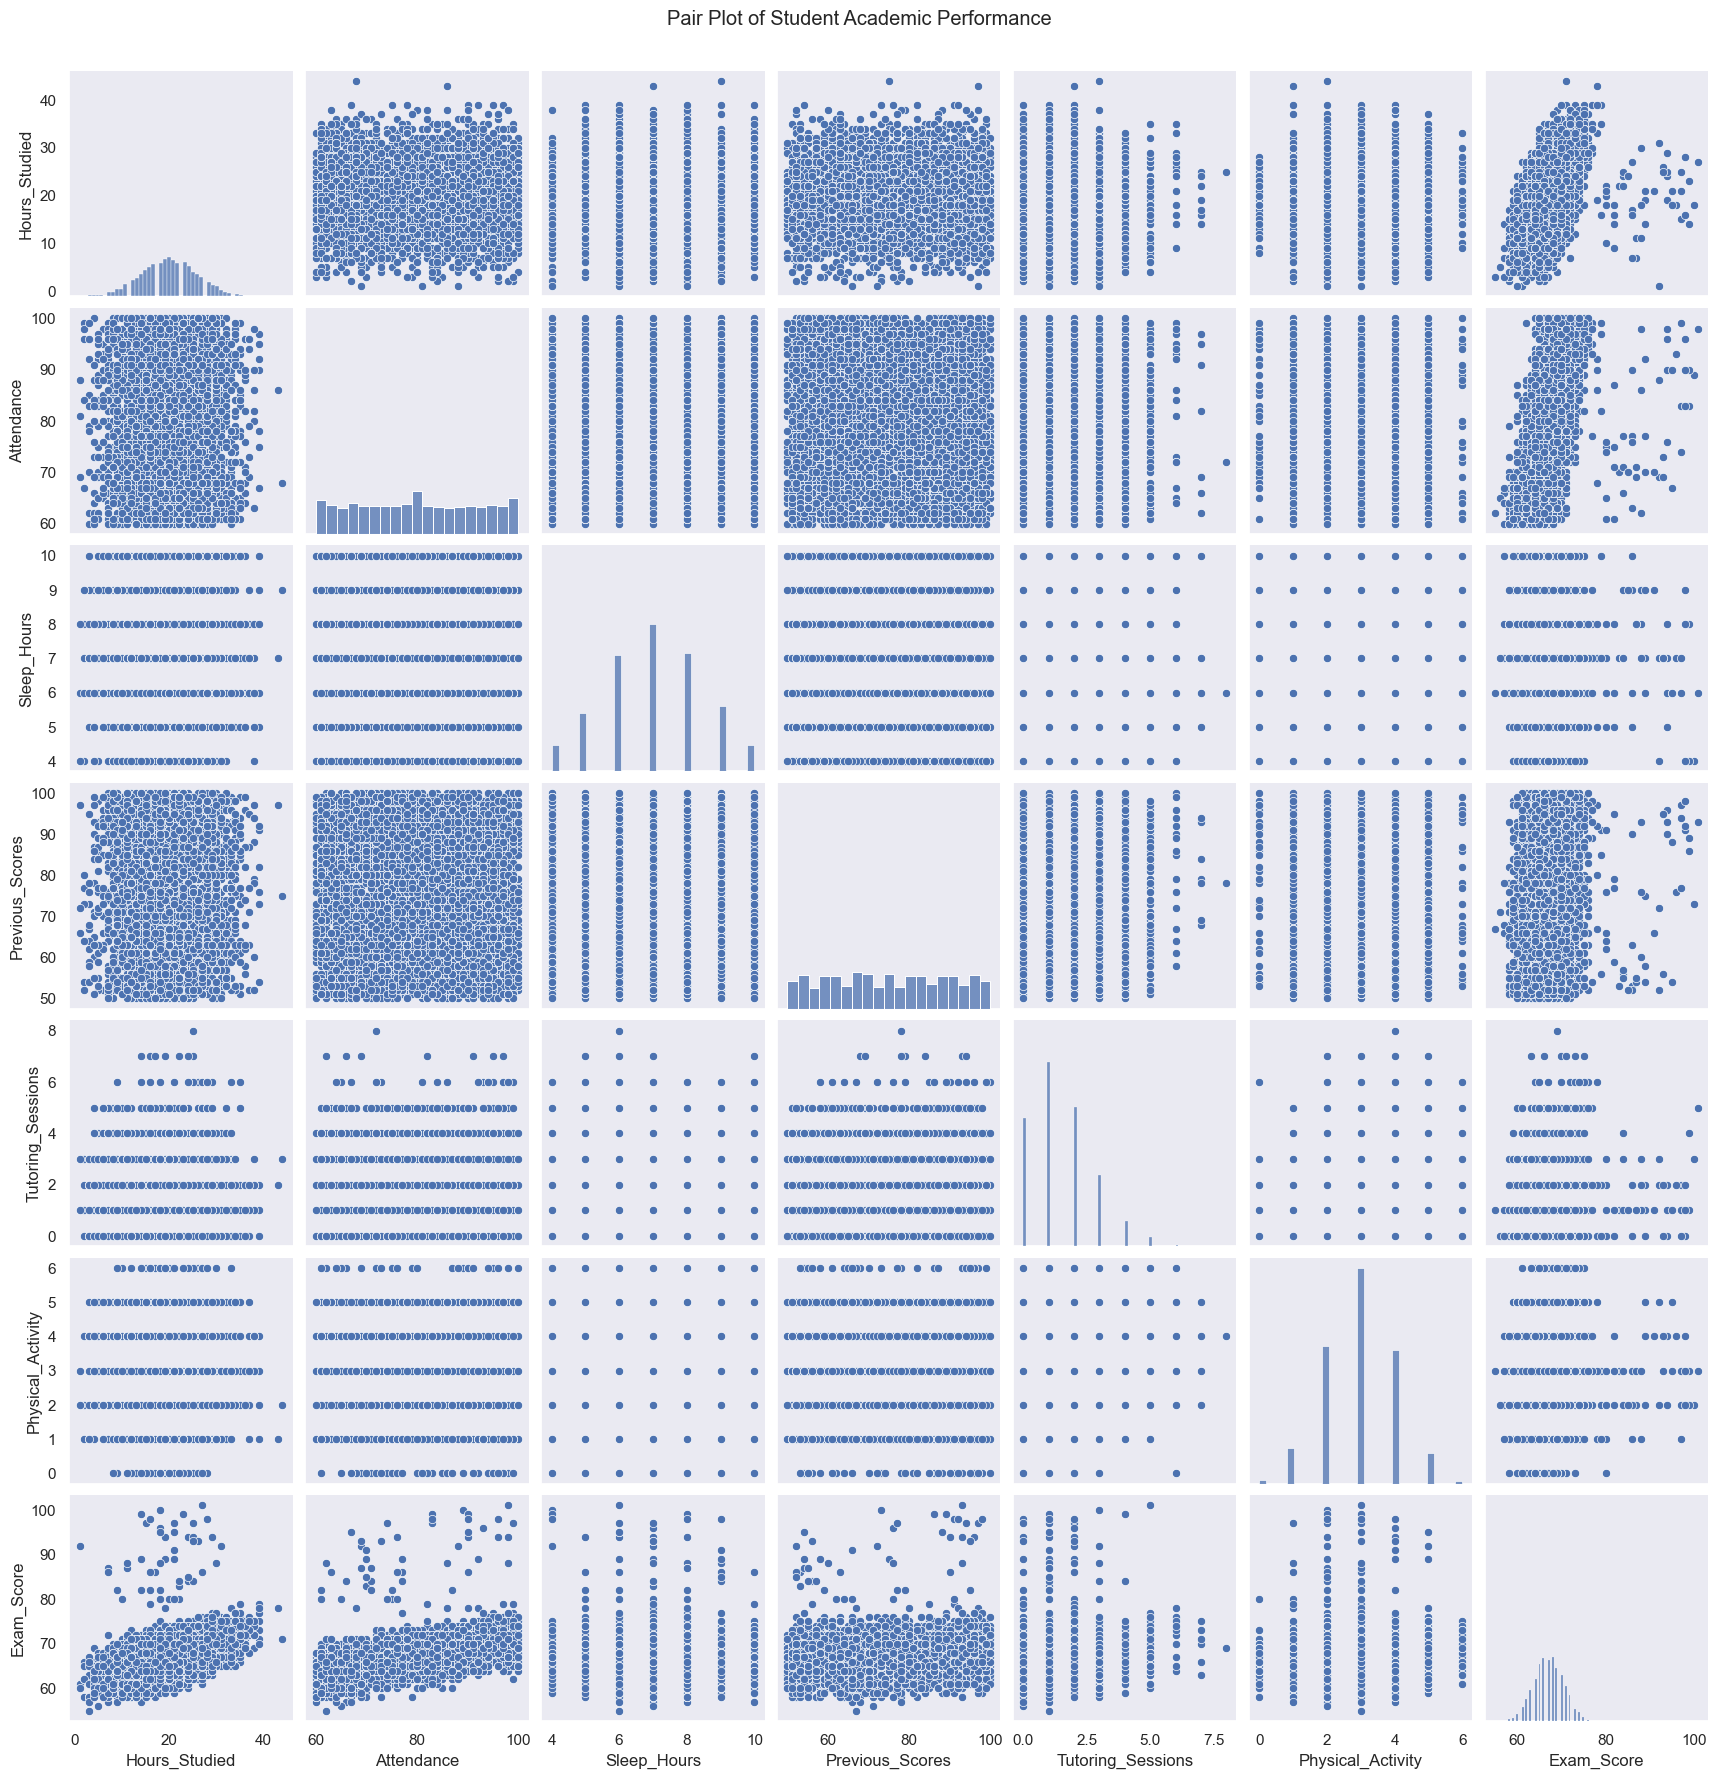

In [37]:
selected_columns= ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                    'Previous_Scores', 'Tutoring_Sessions', 
                    'Physical_Activity', 'Exam_Score']

subset_df = df[selected_columns]
sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Student Academic Performance', y=1.02)
plt.show()